In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import probplot

import sys
sys.path.append("../")

from electronfactors.model.utilities import create_model, pull_data, fit_give, estimate_population_uncertainty


In [3]:
from matplotlib import rc
rc('font',**{'family':'serif',
             'size':'16'})
rc('text', usetex=True)

In [4]:
def create_histogram(data):
    plt.figure(figsize=(6 * 1.618, 6))
    
    bins = np.arange(-1.5, 2, 0.5)
    dbins = bins[1] - bins[0]
    binsTrans = bins - dbins/2

    binsTrans = binsTrans.reshape(-1,1)
    binNum = np.argmin(abs(binsTrans - data),0)

    representative_height = np.zeros(len(binNum))

    for i in range(len(bins)):
        binRef = (binNum == i)
        representative_height[binRef] = np.arange(sum(binRef)) + 1

    plt.hist(data, bins, alpha=0.6, lw=2)
    plt.scatter(data, representative_height, zorder=2, s=120, alpha=0.8, lw=1.5)
    
    uncertainty = estimate_population_uncertainty(data)
    
    print("Mean = %0.2f" % (np.mean(data)))
    print("Uncertainty = %0.2f" % (uncertainty))

In [6]:
width, length, eqPonA, factor = pull_data(energy=12)

In [51]:
mean_store = {}
mean_store[8] = np.array([])
mean_store[12] = np.array([])
mean_store[15] = np.array([])
mean_store[20] = np.array([])

In [67]:
for amount in [8, 12, 15, 20]:
    for j in range(1000):
        order = np.arange(len(width))
        np.random.shuffle(order)
        reference = order[0:amount]
        reference
        check = np.setdiff1d(np.arange(len(width)), reference)
        check
        give = np.zeros(len(check))
        predictions = np.zeros(len(check))

        model = create_model(width[reference], eqPonA[reference], factor[reference])

        for i, value in enumerate(check):
            predictions[i] = model(width[value], eqPonA[value])
            give[i] = fit_give(
                width[value], eqPonA[value], 
                width[reference], eqPonA[reference], factor[reference])

        percent_prediction_differences = 100*(factor[check] - predictions) / factor[check]

        valid = give < 0.5   
        if np.sum(valid) > 3:   
            mean_store[amount] = np.append(mean_store[amount], np.mean(percent_prediction_differences[valid]))

8
-0.00982777133552
0.238268432538


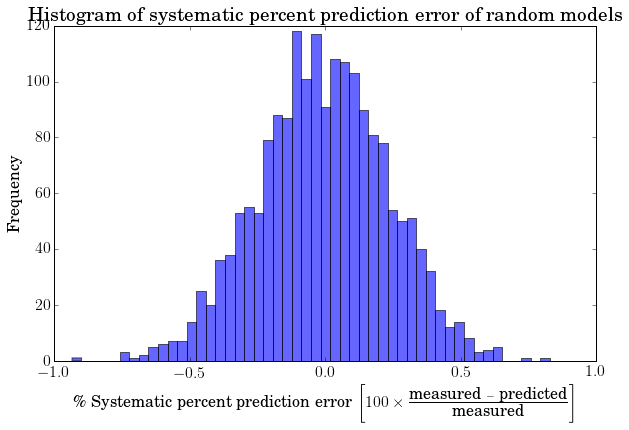

In [68]:
amount = 8
plt.figure(figsize=(6 * 1.618, 6))
plt.hist(mean_store[amount], 50, alpha=0.6, lw=1)

plt.xlabel(
    r'\% Systematic percent prediction error '
    r'$\left[100 \times \frac{\mbox{measured } - \mbox{ predicted}}{\mbox{measured}} \right]$')
plt.ylabel(r'Frequency')
plt.title(r'Histogram of systematic percent prediction error of random models')
print(amount)
print(np.mean(mean_store[amount]))
print(estimate_population_uncertainty(mean_store[amount]))

12
-0.0224065457818
0.184473247362


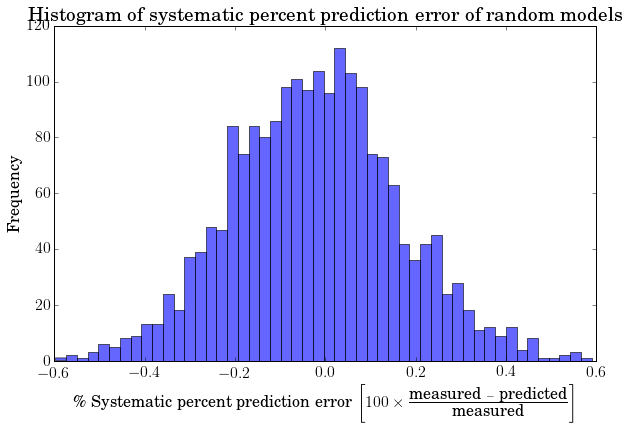

In [69]:
amount = 12
plt.figure(figsize=(6 * 1.618, 6))
plt.hist(mean_store[amount], 50, alpha=0.6, lw=1)

plt.xlabel(
    r'\% Systematic percent prediction error '
    r'$\left[100 \times \frac{\mbox{measured } - \mbox{ predicted}}{\mbox{measured}} \right]$')
plt.ylabel(r'Frequency')
plt.title(r'Histogram of systematic percent prediction error of random models')
print(amount)
print(np.mean(mean_store[amount]))
print(estimate_population_uncertainty(mean_store[amount]))

15
-0.0242818747324
0.166340756459


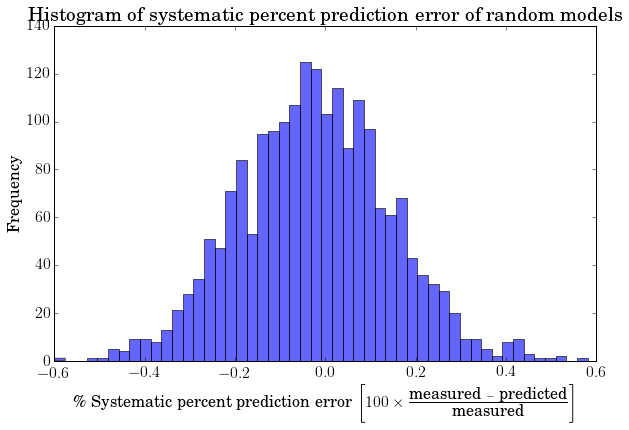

In [70]:
amount = 15
plt.figure(figsize=(6 * 1.618, 6))
plt.hist(mean_store[amount], 50, alpha=0.6, lw=1)

plt.xlabel(
    r'\% Systematic percent prediction error '
    r'$\left[100 \times \frac{\mbox{measured } - \mbox{ predicted}}{\mbox{measured}} \right]$')
plt.ylabel(r'Frequency')
plt.title(r'Histogram of systematic percent prediction error of random models')
print(amount)
print(np.mean(mean_store[amount]))
print(estimate_population_uncertainty(mean_store[amount]))

20
-0.0164904747389
0.146852818984


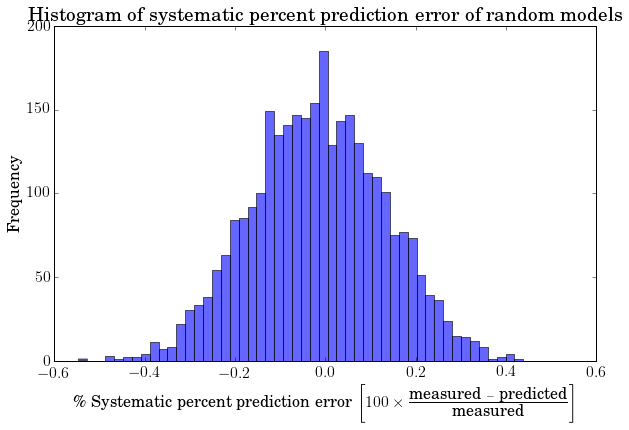

In [71]:
amount = 20
plt.figure(figsize=(6 * 1.618, 6))
plt.hist(mean_store[amount], 50, alpha=0.6, lw=1)

plt.xlabel(
    r'\% Systematic percent prediction error '
    r'$\left[100 \times \frac{\mbox{measured } - \mbox{ predicted}}{\mbox{measured}} \right]$')
plt.ylabel(r'Frequency')
plt.title(r'Histogram of systematic percent prediction error of random models')
print(amount)
print(np.mean(mean_store[amount]))
print(estimate_population_uncertainty(mean_store[amount]))